<a href="https://colab.research.google.com/github/anasbeg03/Projects_DA/blob/main/Copy_of_McDonalds_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset
data = {
    "yummy": [1, 0, 1, 0, 1],
    "convenient": [1, 1, 1, 0, 1],
    "spicy": [0, 0, 1, 0, 0],
    "fattening": [1, 1, 1, 1, 1],
    "greasy": [1, 1, 1, 1, 1],
    "fast": [1, 1, 0, 1, 1],
    "cheap": [0, 1, 0, 1, 1],
    "tasty": [1, 0, 1, 0, 1],
    "expensive": [0, 1, 0, 1, 1],
    "healthy": [0, 0, 0, 0, 0],
    "disgusting": [0, 0, 1, 0, 0],
    "age": [23, 45, 34, 25, 40],
    "gender": ["F", "M", "M", "F", "F"]
}

df = pd.DataFrame(data)
print(df.head())


   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      1           1      0          1       1     1      0      1          0   
1      0           1      0          1       1     1      1      0          1   
2      1           1      1          1       1     0      0      1          0   
3      0           0      0          1       1     1      1      0          1   
4      1           1      0          1       1     1      1      1          1   

   healthy  disgusting  age gender  
0        0           0   23      F  
1        0           0   45      M  
2        0           1   34      M  
3        0           0   25      F  
4        0           0   40      F  


          yummy  convenient     spicy  fattening  greasy      fast     cheap  \
count  5.000000    5.000000  5.000000        5.0     5.0  5.000000  5.000000   
mean   0.600000    0.800000  0.200000        1.0     1.0  0.800000  0.600000   
std    0.547723    0.447214  0.447214        0.0     0.0  0.447214  0.547723   
min    0.000000    0.000000  0.000000        1.0     1.0  0.000000  0.000000   
25%    0.000000    1.000000  0.000000        1.0     1.0  1.000000  0.000000   
50%    1.000000    1.000000  0.000000        1.0     1.0  1.000000  1.000000   
75%    1.000000    1.000000  0.000000        1.0     1.0  1.000000  1.000000   
max    1.000000    1.000000  1.000000        1.0     1.0  1.000000  1.000000   

          tasty  expensive  healthy  disgusting        age  
count  5.000000   5.000000      5.0    5.000000   5.000000  
mean   0.600000   0.600000      0.0    0.200000  33.400000  
std    0.547723   0.547723      0.0    0.447214   9.449868  
min    0.000000   0.000000      0.0

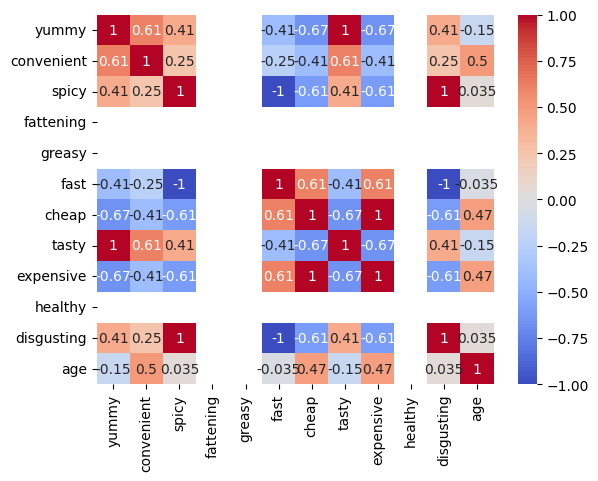

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(df.describe())

# Correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Converting back to DataFrame for easier manipulation
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
print(scaled_df.head())


      yummy  convenient  spicy  fattening  greasy  fast     cheap     tasty  \
0  0.816497         0.5   -0.5        0.0     0.0   0.5 -1.224745  0.816497   
1 -1.224745         0.5   -0.5        0.0     0.0   0.5  0.816497 -1.224745   
2  0.816497         0.5    2.0        0.0     0.0  -2.0 -1.224745  0.816497   
3 -1.224745        -2.0   -0.5        0.0     0.0   0.5  0.816497 -1.224745   
4  0.816497         0.5   -0.5        0.0     0.0   0.5  0.816497  0.816497   

   expensive  healthy  disgusting       age    gender  
0  -1.224745      0.0        -0.5 -1.230446 -0.816497  
1   0.816497      0.0        -0.5  1.372421  1.224745  
2  -1.224745      0.0         2.0  0.070987  1.224745  
3   0.816497      0.0        -0.5 -0.993822 -0.816497  
4   0.816497      0.0        -0.5  0.780860 -0.816497  


In [ ]:
from sklearn.cluster import KMeans

# Performing k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
segments = kmeans.fit_predict(scaled_df)

# Adding segment labels to the original data
df['Segment'] = segments
print(df.head())


   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      1           1      0          1       1     1      0      1          0   
1      0           1      0          1       1     1      1      0          1   
2      1           1      1          1       1     0      0      1          0   
3      0           0      0          1       1     1      1      0          1   
4      1           1      0          1       1     1      1      1          1   

   healthy  disgusting  age  gender  Segment  
0        0           0   23       0        2  
1        0           0   45       1        0  
2        0           1   34       1        1  
3        0           0   25       0        0  
4        0           0   40       0        2  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Grouping by segment and calculating the mean for each feature
profile = df.groupby('Segment').mean()
print(profile)


         yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
Segment                                                                    
0          0.0         0.5    0.0        1.0     1.0   1.0    1.0    0.0   
1          1.0         1.0    1.0        1.0     1.0   0.0    0.0    1.0   
2          1.0         1.0    0.0        1.0     1.0   1.0    0.5    1.0   

         expensive  healthy  disgusting   age  gender  
Segment                                                
0              1.0      0.0         0.0  35.0     0.5  
1              0.0      0.0         1.0  34.0     1.0  
2              0.5      0.0         0.0  31.5     0.0  


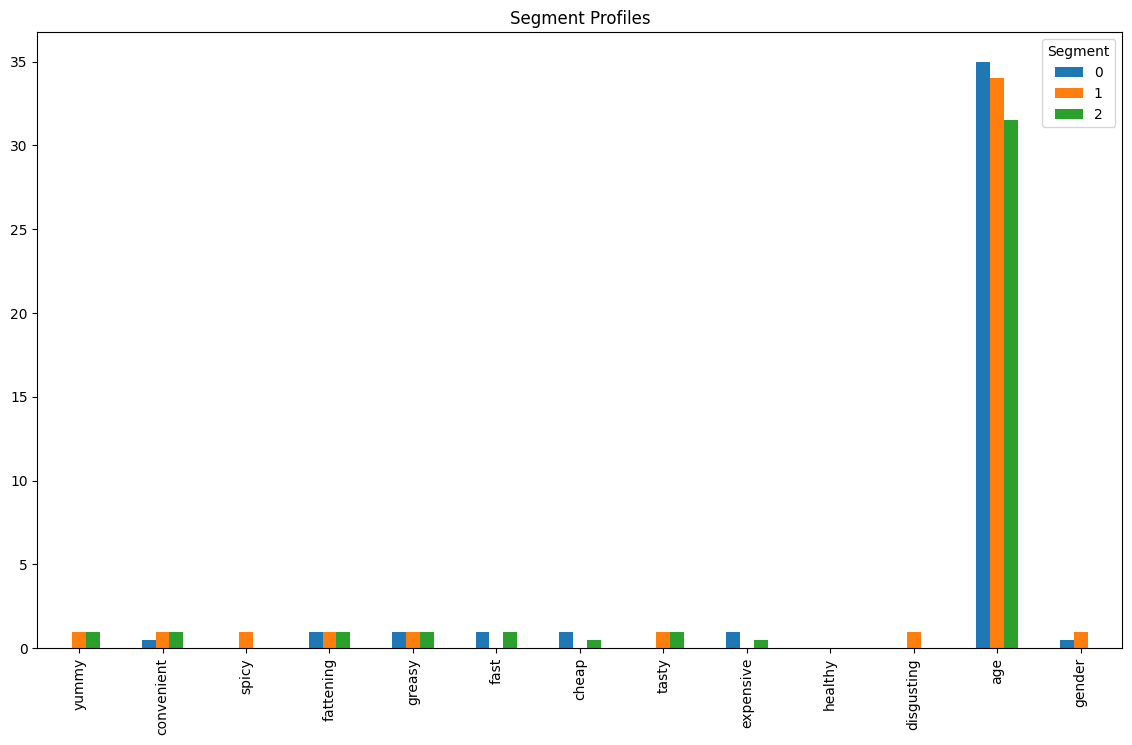

In [ ]:
# Bar plot for segment profiles
profile.T.plot(kind='bar', figsize=(14, 8))
plt.title('Segment Profiles')
plt.show()


In [ ]:
for segment in profile.index:
      print(f"\nSegment {segment} Profile:\n{profile.loc[segment]}")



Segment 0 Profile:
yummy          0.0
convenient     0.5
spicy          0.0
fattening      1.0
greasy         1.0
fast           1.0
cheap          1.0
tasty          0.0
expensive      1.0
healthy        0.0
disgusting     0.0
age           35.0
gender         0.5
Name: 0, dtype: float64

Segment 1 Profile:
yummy          1.0
convenient     1.0
spicy          1.0
fattening      1.0
greasy         1.0
fast           0.0
cheap          0.0
tasty          1.0
expensive      0.0
healthy        0.0
disgusting     1.0
age           34.0
gender         1.0
Name: 1, dtype: float64

Segment 2 Profile:
yummy          1.0
convenient     1.0
spicy          0.0
fattening      1.0
greasy         1.0
fast           1.0
cheap          0.5
tasty          1.0
expensive      0.5
healthy        0.0
disgusting     0.0
age           31.5
gender         0.0
Name: 2, dtype: float64
